## Exercise 3

In [36]:
import numpy as np
import matplotlib.pyplot as plt

import isingmod as im # <- this is the relevant module, open isingmod.py for details
%matplotlib notebook

### a) Equilibration

In [37]:
def equilibrate(N, kT, b, c):
    
    I = im.ising(N, kT = kT, flipratio = .1)

    n_steps = np.linspace(1,b,c,dtype=int)
    energy = np.zeros(len(n_steps))

    I.advance()
    energy[0] = I.compute_energy()
    
    iterations = 0

    for i in range(len(n_steps)-1):
        I.evolve(n_steps = n_steps[i+1])
        energy[i+1] = I.compute_energy()   
        
    I.reset(kT = 2.0)

    return n_steps, energy

def plot(x, y, xlabel, ylabel, label='label', color='black'):
    size = 14; fig, ax = plt.subplots(figsize = (8, 5))
    
    if label != 'label':
        plt.plot(x, y, color=color , label=label, linewidth=1.0)
        plt.setp(ax.legend().texts, family='Serif', fontsize=size)

    plt.plot(x, y, color=color, linewidth=1.5) 
    
    #plt.setp(ax.legend().texts, family='Serif', fontsize=size)
    #ax.set(xlim=(-3, 3), ylim=(-2.5, 2.5))
    plt.xlabel(xlabel, fontsize=size, fontname='Serif'); plt.ylabel(ylabel, fontsize=size, fontname='Serif')
    for tick in ax.get_xticklabels():
        tick.set_fontname("Serif")
    for tick in ax.get_yticklabels():
        tick.set_fontname("Serif")
    ax.tick_params(labelsize=size); 
    plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
    plt.show()

<IPython.core.display.Javascript object>


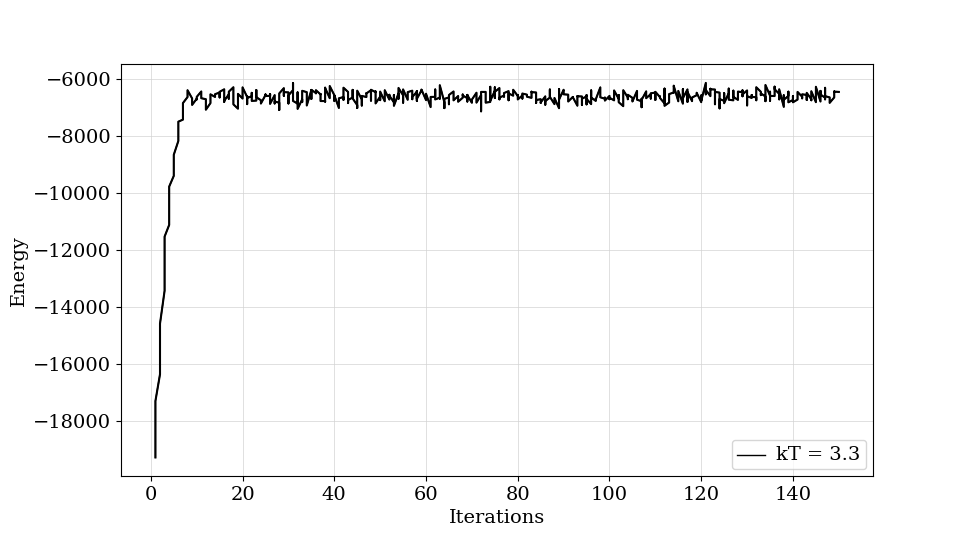

In [13]:
n_steps, energy = equilibrate(100, 3.3, 150, 500)
plot(n_steps, energy, 'Iterations', 'Energy', label='kT = 3.3', color='black')

In [14]:
plt.savefig("3a.pdf")

#### Discuss the results ####

The system equilibrates rapidly for a low number of iterations. Choosing an arbitrary iteration value at 40 to ensure the system has had some time to equilibrate but also does not require a high number of iterations.

### b), c)

<IPython.core.display.Javascript object>


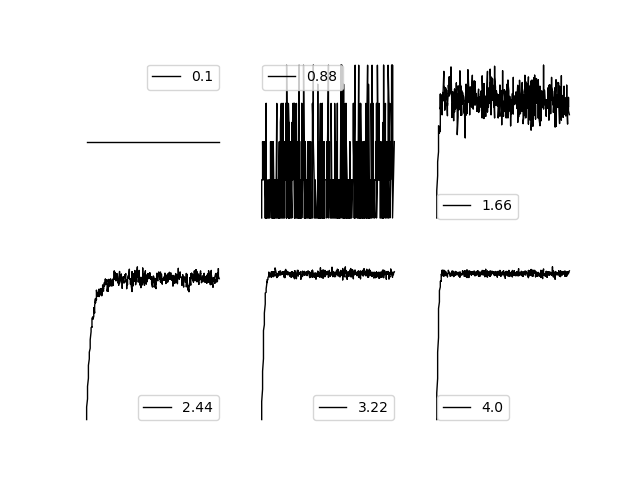

In [3]:
kT = np.round(np.linspace(0.1,4.0,6),2)
for i in range(len(kT)):
    n_steps, energy = equilibrate(100, kT[i], 150, 500)
    plt.subplot(2, 3, i+1)
    plt.plot(n_steps, energy, label=kT[i], color='black', linewidth=1.0)
    plt.legend(); plt.axis('off'); plt.show()

<IPython.core.display.Javascript object>


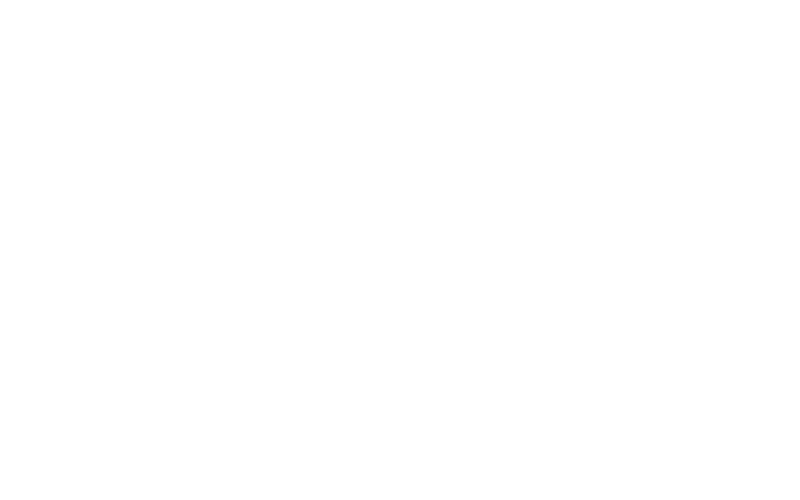

<IPython.core.display.Javascript object>


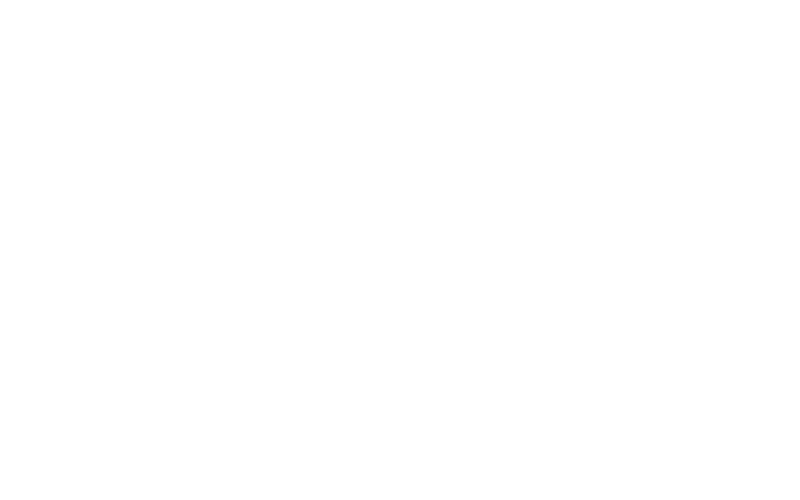

<IPython.core.display.Javascript object>


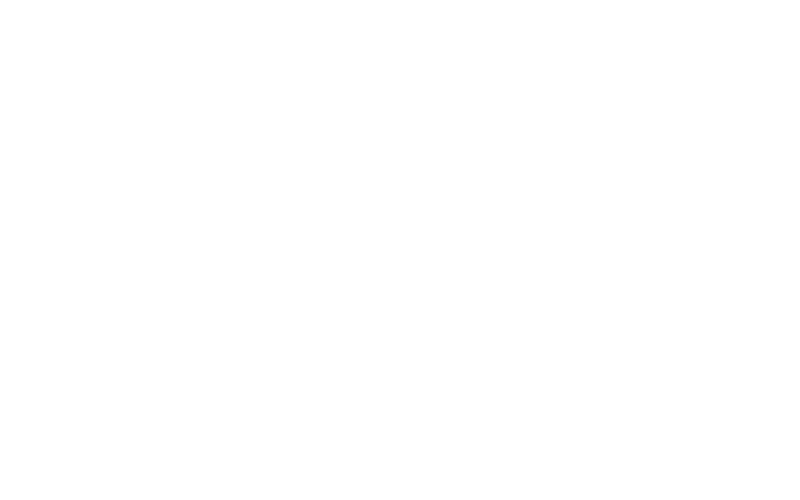

In [40]:
def monitor(N, kT, iterations, samples = 100, separations = 100):
    I = im.ising(N, kT = kT, flipratio = .1)
    I.advance() 
    I.evolve(n_steps = iterations)
    mean_energy, specific_heat, mean_magnetization = I.sample(n_samples = samples, n_separations = separations)
    
    me = mean_energy
    sh = specific_heat
    mm = mean_magnetization
    
    I.reset(kT = 2.0)
    
    return me, sh, mm

kT = np.linspace(0.1,7.0,100) #(0.1,50,100)
m_energy = np.zeros(100)
s_heat = np.zeros(100)
m_magnetization = np.zeros(100)

for i in range(len(kT)):
    me, sh, mm = monitor(100, kT[i], 40)
    m_energy[i] = me
    s_heat[i] = sh
    m_magnetization[i] = mm

plot(kT, m_magnetization, 'kT', '$\\langle M \\rangle$', color='black')
plt.savefig('3b_1.pdf')
plot(kT, m_energy, 'kT', '$\\langle E \\rangle$', color='black')
plt.savefig('3b_2.pdf')
plot(kT, s_heat, 'kT', 'Specific Heat', color='black')
plt.savefig('3b_3.pdf')

### e) 

<IPython.core.display.Javascript object>


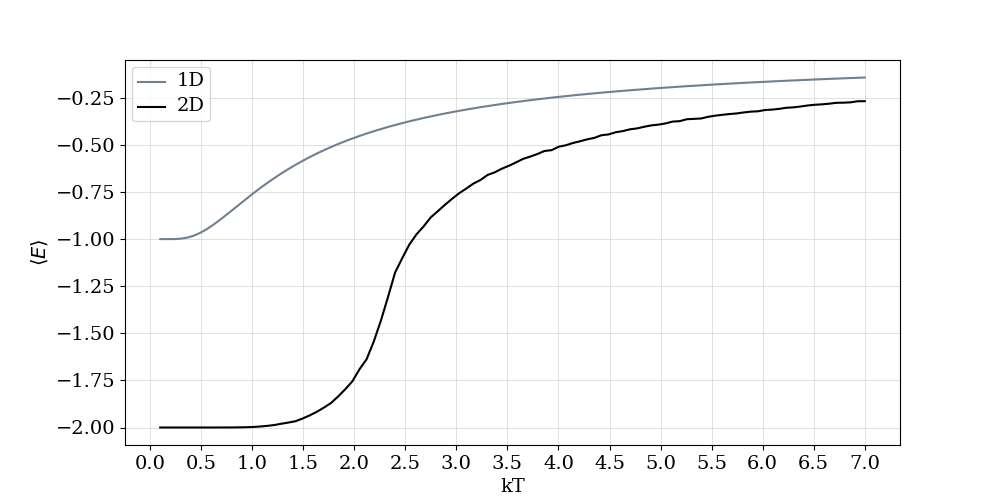

In [53]:
#Comparing to 1D Ising Model from exercise 2

beta = np.linspace(0.1,7.0,200)
size = 14; fig, ax = plt.subplots(figsize = (10, 5))

#PLOTS
plt.plot(beta, (-1*np.sinh(1/beta))/(np.cosh(1/beta)), '-', label="1D", color='slategrey', linewidth=1.5)
plt.plot(kT, m_energy, '-', label="2D", color='black', linewidth=1.5)

#PLOTTING DETAILS
#ax.set(xlim=(-50, 50.0), ylim=(-50, 50))
plt.xlabel("kT", fontsize=size, fontname='Serif'); plt.ylabel("$\\langle E \\rangle $", fontsize=size, fontname='Serif')
x_ticks = [0, 0.5, 1, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7]
#y_ticks = [-1, -0.8, -0.6, -0.4, -0.25, 0]
plt.xticks(ticks=x_ticks); #plt.yticks(ticks=y_ticks)
for tick in ax.get_xticklabels():
    tick.set_fontname("Serif")
for tick in ax.get_yticklabels():
    tick.set_fontname("Serif")
ax.tick_params(labelsize=size); plt.setp(ax.legend().texts, family='Serif', fontsize=size)
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig("3e.pdf")
plt.show()

<IPython.core.display.Javascript object>


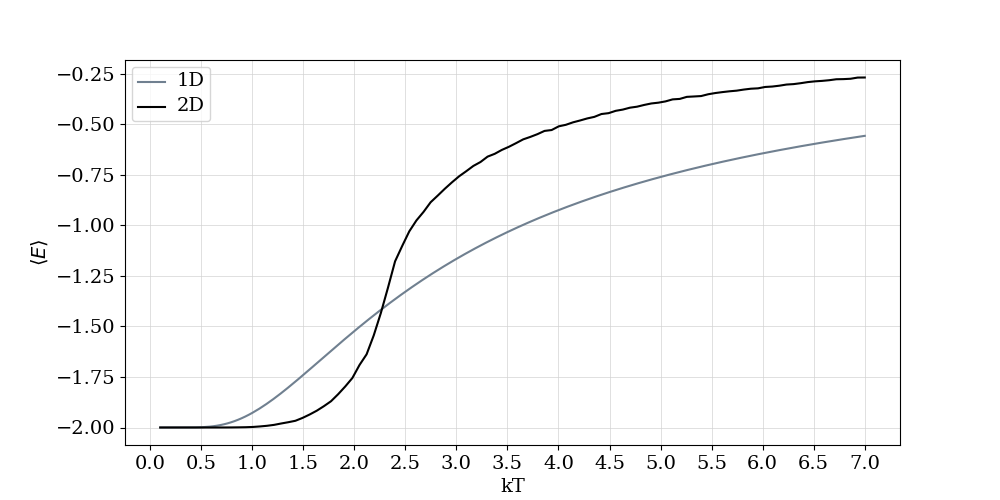

In [54]:
#Comparing to 1D Ising Model from exercise 2

beta = np.linspace(0.1,7.0,200)
size = 14; fig, ax = plt.subplots(figsize = (10, 5))

#PLOTS
plt.plot(beta, (-2*np.sinh(2*1/beta))/(np.cosh(2*1/beta)), '-', label="1D", color='slategrey', linewidth=1.5)
plt.plot(kT, m_energy, '-', label="2D", color='black', linewidth=1.5)

#PLOTTING DETAILS
#ax.set(xlim=(-50, 50.0), ylim=(-50, 50))
plt.xlabel("kT", fontsize=size, fontname='Serif'); plt.ylabel("$\\langle E \\rangle $", fontsize=size, fontname='Serif')
x_ticks = [0, 0.5, 1, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7]
#y_ticks = [-1, -0.8, -0.6, -0.4, -0.25, 0]
plt.xticks(ticks=x_ticks); #plt.yticks(ticks=y_ticks)
for tick in ax.get_xticklabels():
    tick.set_fontname("Serif")
for tick in ax.get_yticklabels():
    tick.set_fontname("Serif")
ax.tick_params(labelsize=size); plt.setp(ax.legend().texts, family='Serif', fontsize=size)
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig("3e_2.pdf")
plt.show()

### d) 

<IPython.core.display.Javascript object>


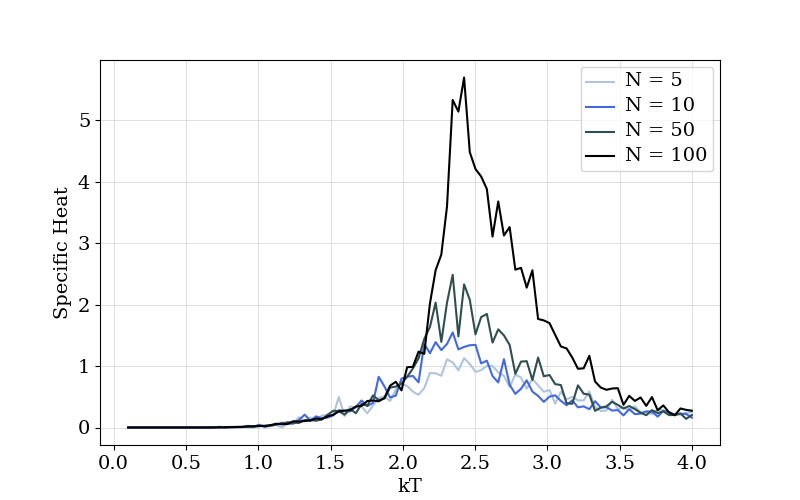

In [55]:
N = [5, 10, 50, 100]
kT = np.linspace(0.1,4.0,100)
color = ['lightsteelblue', 'royalblue', 'darkslategrey', 'black']

s_heat = np.zeros(100)
size = 14; fig, ax = plt.subplots(figsize = (8, 5))

for l in range(len(N)):
    
    lattice_size = N[l]
    
    for i in range(len(kT)):
        me, sh, mm = monitor(lattice_size, kT[i], 40)
        s_heat[i] = sh
        
    plt.plot(kT, s_heat, color=color[l] , label= f"N = {lattice_size}", linewidth=1.5)
    plt.setp(ax.legend().texts, family='Serif', fontsize=size)
    #ax.set(xlim=(-3, 3), ylim=(-2.5, 2.5))
    plt.xlabel('kT', fontsize=size, fontname='Serif'); plt.ylabel('Specific Heat', fontsize=size, fontname='Serif')
    for tick in ax.get_xticklabels():
        tick.set_fontname("Serif")
    for tick in ax.get_yticklabels():
        tick.set_fontname("Serif")
    ax.tick_params(labelsize=size); 
    plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
    plt.show()
    
plt.savefig('3d.pdf')